In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
def kmeans(k, X, draw=False):
    centers = np.random.rand(k,2)
    for i in range(5):
        dist_x =  []
        for c in centers:
            d = np.asarray([np.sqrt(np.sum((elem-c)**2)) for elem in X])
            dist_x.append(d)

        dist_x = np.asarray(dist_x)
        indexes = np.argmin(dist_x, axis=0)
        
    for i in range(k):
        centers[i, :] = np.mean(X[indexes == i, :], axis=0)

    if draw:
        plt.subplot(2, 2, 1)
        plt.scatter(X[:, 0], X[:, 1], c='turquoise', marker='o')

        plt.subplot(2, 2, 2)
        plt.plot(centers[:, 0], centers[:, 1], 'ro')
        for i in range(k):
            plt.scatter(X[indexes == i, 0], X[indexes == i, 1], marker='*')
            

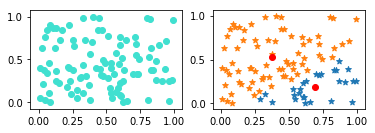

In [4]:
k = 2
count_points = 100
np.random.seed(64)
X = np.random.rand(count_points,2)
kmeans(k, X, draw=True)

### Исследования

In [18]:
def kmeans_research(k, X, draw=False):
    centers = np.random.rand(k,2)*10
    history = centers.copy()
    for i in range(50):
        dist_x =  []
        for c in centers:
            d = np.asarray([np.sqrt(np.sum((elem-c)**2)) for elem in X])
            dist_x.append(d)

        dist_x = np.asarray(dist_x)
        indexes = np.argmin(dist_x, axis=0)
        
    for i in range(k):
        centers[i, :] = np.mean(X[indexes == i, :], axis=0)

    if draw:
        plt.subplot(2, 2, 1)
        plt.scatter(X[:, 0], X[:, 1], c='black', marker='o')
        plt.scatter(history[:, 0], history[:, 1], c='red', marker='o')
            
#         plt.subplot(2, 2, 2)
#         plt.scatter(X[:, 0], X[:, 1], c='turquoise', marker='o')

        plt.subplot(2, 2, 3)
        plt.plot(centers[:, 0], centers[:, 1], 'ro')
        for i in range(k):
            plt.scatter(X[indexes == i, 0], X[indexes == i, 1], marker='*')
            

Рассмотрим множества 
* Равномерно распределенное множество

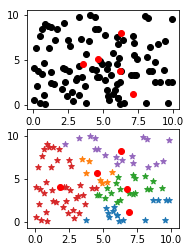

In [19]:
k = 5
count_points = 100
np.random.seed(64)
X = np.random.rand(count_points,2)*10
kmeans_research(k, np.asarray(X), draw=True)

* Множество неравномерно распределённое

D:\MyPrograms\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\MyPrograms\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


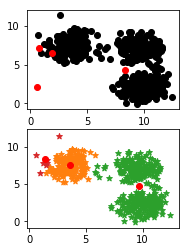

In [52]:
X, y = make_blobs(n_samples=500, n_features=2,
centers=3, random_state=24, center_box=(0.0, 10.0))
kmeans_research(4, X, draw=True)

* Функционально зависимое множество

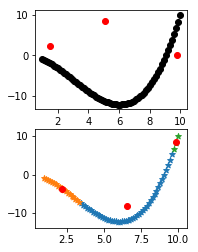

In [51]:
count_points = 70
val_x = np.linspace(1, 10, count_points)
val_y = [0.11*x**3-x**2 for x in val_x]
X = [ [val_x[i],val_y[i]] for i in range(count_points)]
kmeans_research(3, np.asarray(X), True)

#### Вывод:
1) <img src="image/img1.png">
Центроиды первоначально принадлежащие изучаемому множеству лучше получают кластеры

2) <img src="image/img2.png">
Если центориды расположены рядом – начинают «слипаться» кластера. (в настройках было указано разбить множество на 3 кластера, получено 2)

3) <img src="image/img3.png">
Сложности с кластеризацией множеств без определённого скопления точек
<img src="image/img4.png">
Но если увеличить число центроид – то можно увидеть, что в одни кластера попадают почти одни и те же точки. То есть выделяются небольшие скопления, но кластеры достаточно отличаются в  каждом эксперименте. Следоватеьлно появляется вопрос по поиску оптимального кол-ва кластеров, на которые нужно разбить полученные данные

4) <img src="image/img5.png">
Алгоритм отлично справляется с множествами неравномерно распределёнными 

5) <img src="image/img6.png">
Не подходит к данным функционально зависимым 

### Выбор кол-ва центроид

* Базовый алгоритм: Разделим матрицу на блоки. Посчитаем кол-во принадлежащих каждому блоку точек. Посчитаем кол-во блок с максимальным числом точек. Полученное число - число центроид
* Усложнённый алгоритм: Можно продолжить дробить блоки дальше. Не анализировать блоки, где минимальное число точек (выигрыш в скорости выполнения). На последнем шаге объединять блоки смаксимальной плотностью точек, если они "соседние"(i+-blk_i, j+-blk_j)
* Скорость настройки(базового алгоритма) зависит от кол-ва входных данных линейно

In [23]:
def define_kcentroids(X):
    count_points = len(X)
    grid = 3
    analysis = []
    max_i, max_j = np.amax(X, axis=0)
    blk_i = max_i/grid
    blk_j = max_j/grid
    str_i = 0
    end_i = blk_i
    for i in range(grid):
        str_j = 0
        end_j = blk_j
        for j in range(grid):
            points = [x for x in X if 
                          x[0]>=str_i and x[0]<end_i and 
                          x[1]>=str_j and x[1]<end_j]
            analysis.append([i, j, len(points)])
            str_j += blk_j
            end_j += blk_j
        str_i += blk_i
        end_i += blk_i

    analysis = np.asarray(analysis)
    density = np.amax(analysis, axis=0)[2]
    eps = count_points//10
    k_centroids = [a for a in analysis if density-eps<a[2]<density+eps]

    centers = []
    for c in k_centroids:
        p_i = c[0]*blk_i + blk_i/2
        p_j = c[1]*blk_j + blk_j/2
        centers.append([p_i, p_j]) 
    centers = np.asarray(centers)

In [24]:
X_100 = np.random.rand(100,2)
X_1000 = np.random.rand(1000,2)
X_2000 = np.random.rand(2000,2)

In [49]:
%%time
define_kcentroids(X_100)

Wall time: 1.99 ms


In [50]:
%%time
define_kcentroids(X_1000)

Wall time: 7.98 ms


In [46]:
%%time
define_kcentroids(X_2000)

Wall time: 15.9 ms
